<h3> K Means Clustering Unsupervised Classification of 77 Chicago Community Areas by 6 Standardized Hardship Indicators</h3>

Datasets:  standardizedindictors.xlsx

1) import the usual libraries

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt # plotting library

2) Import library for KMeans clustering

In [2]:
import sklearn
from sklearn.cluster import KMeans 

3) Read homicide data

In [75]:
hom_df = pd.read_excel('standardizedindicators.xlsx')
hom_df.head(2)

,Community,index,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17,LAT,LON
0,Albany Park,13,47.0,-0.705481,0.667993,-0.470891,1.42992,-0.353466,-0.165118,45.7,-0.706842,0.506067,-0.530539,1.562581,-0.418499,-0.183089,2,1,41.96823,-87.72421
1,Archer Heights,56,54.4,-0.193683,1.136956,0.471085,1.51857,-0.672245,-0.605100,56.1,-0.442634,1.090575,0.742190,1.945762,-0.473646,-0.607925,0,3,41.81093,-87.72677


4) Create dataframe with just HI and HOM 2017 info

In [76]:
HIHOM=hom_df[["UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17"]]
HIHOM.head()

,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17
0,-0.706842,0.506067,-0.530539,1.562581,-0.418499,-0.183089
1,-0.442634,1.090575,0.742190,1.945762,-0.473646,-0.607925
2,-0.128101,2.243355,0.773232,0.552377,1.575995,-0.574983
3,0.035456,-0.257040,0.229994,-0.283653,-0.896442,-0.290469
4,1.054544,0.018978,0.586979,-0.771338,0.629300,-0.609312


5) Use the KMeans() function to make n_clusters=2 clusters and get the labels indicating which cluster each point belongs to.

In [77]:
# Fit the k means model
k_means = KMeans(init="k-means++", n_clusters=2, n_init=2)
k_means.fit(HIHOM)
#Get Labels
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

6) Add the Labels to hom_df

In [78]:
hom_df["CLASS"]=k_means_labels
hom_df.tail(50)

,Community,index,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,...,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17,LAT,LON,CLASS
27,Garfield Ridge,55,35.4,-0.467436,-0.137207,0.231853,-0.697690,-1.215032,0.073594,38.7,...,0.197577,0.323121,-0.179149,-1.356003,-0.005261,1,5,41.81670,-87.76000,0
28,Grand Boulevard,37,49.6,0.996547,-0.323022,0.396325,-0.609040,0.869958,-0.231446,49.8,...,-0.240804,0.509374,-0.736503,1.052096,-0.254290,8,9,41.81344,-87.61797,1
29,Greater Grand Crossing,68,54.8,1.175081,-0.376112,0.710317,-0.136238,1.050887,-0.617059,54.3,...,-0.338222,0.385205,-0.318488,1.318641,-0.710681,12,22,41.76247,-87.61780,1
30,Hegewisch,54,40.2,-0.776895,-0.119510,0.829933,-0.431739,-0.525779,-0.113102,37.0,...,-0.273276,-0.173554,-0.388157,-0.537985,-0.084957,0,1,41.65589,-87.54754,0
31,Hermosa,19,55.2,-0.419826,1.959852,0.112237,0.691166,0.094548,-0.717367,54.3,...,2.080992,-0.049385,0.865889,0.114592,-0.642659,3,3,41.92598,-87.73569,1
32,Humboldt Park,22,63.6,0.187191,0.995382,0.441181,2.198223,0.852727,-0.745008,60.3,...,0.928212,0.478331,1.736754,0.831507,-0.760961,26,30,41.90049,-87.72078,1
33,Hyde Park,40,26.0,-0.907820,-1.349431,-1.368010,-0.786341,-0.103612,0.600030,25.3,...,-1.458529,-1.399719,-0.875842,0.206504,0.734142,3,1,41.79525,-87.59261,0
34,Irving Park,15,38.2,-0.812602,0.163637,-0.635363,0.366115,-0.749786,0.015305,32.3,...,-0.143386,-0.809918,-0.213984,-0.988354,0.117145,1,2,41.95396,-87.72049,0
35,Jefferson Park,10,33.7,-0.669775,-0.526534,0.112237,-0.402189,-1.042719,0.339622,31.3,...,-0.484349,-0.033864,-0.422992,-1.254899,0.356407,1,1,41.97893,-87.76955,0
36,Kenwood,38,34.1,-0.229390,-0.853923,-0.097091,-0.904541,-0.017455,0.689948,34.6,...,-0.922730,-0.002822,-0.806172,0.243269,0.778758,1,4,41.80971,-87.59639,0


7) Create a scatter plot which shows the classes with homicide counts for select communities. 

No handles with labels found to put in legend.


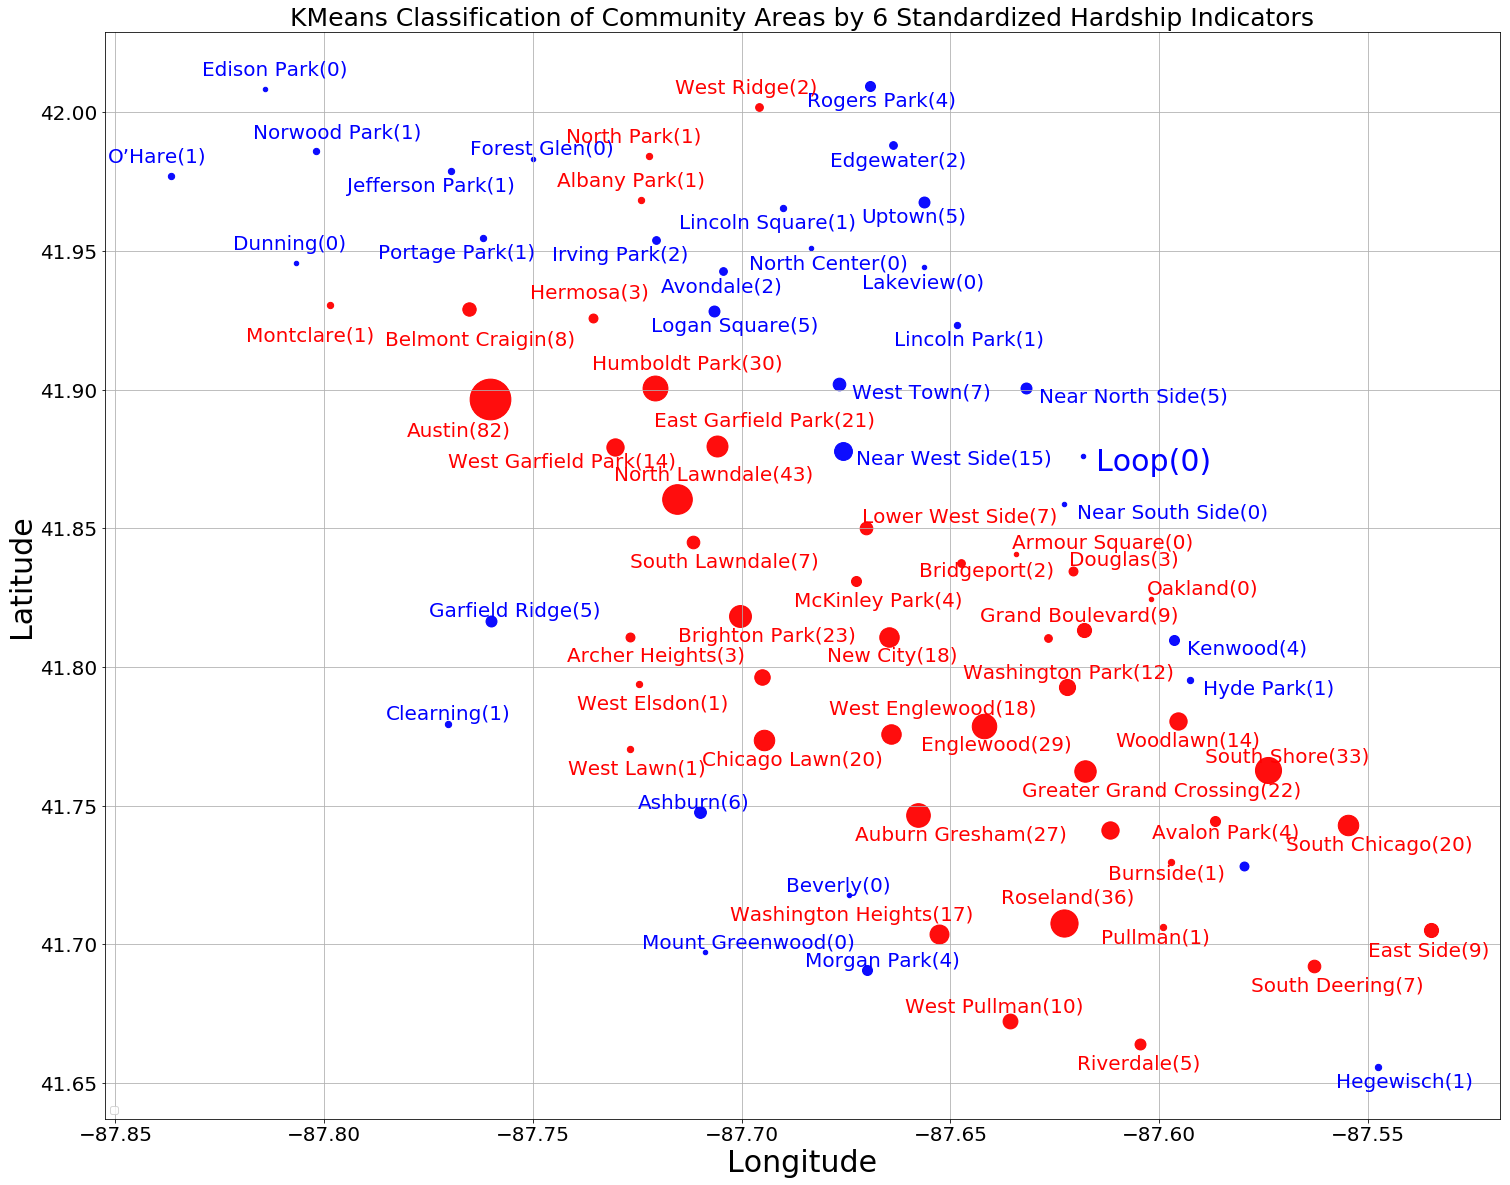

In [187]:
fig=plt.figure(figsize=(25,20))

for i in hom_df.index:
    if hom_df.loc[i,"CLASS"]==0:   #toggle class (0 or 1) if "Loop" does not appear on the map
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=20*hom_df.loc[i,'HOM17']+20,color='b', alpha=0.95)
        if hom_df.loc[i,"Community"] in ["Loop"]:
            plt.gca().text(hom_df.loc[i,'LON']+.003, hom_df.loc[i,'LAT']-.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=30)
        if hom_df.loc[i,"Community"] in ["Hyde Park","Near West Side","Kenwood","Near North Side","Near South Side","West Town"]:
            plt.gca().text(hom_df.loc[i,'LON']+.003, hom_df.loc[i,'LAT']-.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
        if hom_df.loc[i,"Community"] in ["Lincoln Park","Lakeview","Uptown","Edgewater","Rogers Park","Logan Square","Avondale","North Center"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
        if hom_df.loc[i,"Community"] in ["Lincoln Square","Irving Park","Portage Park","Jefferson Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
        if hom_df.loc[i,"Community"] in ["Dunning","O’Hare","Edison Park","Norwood Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
        if hom_df.loc[i,"Community"] in ["Forest Glen","Garfield Ridge","Clearning","Ashburn","Beverly","Mount Greenwood","Morgan Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.0015, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
    
        
        
        if hom_df.loc[i,"Community"] in ["Hegewisch"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
    
    
    else:
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=20*hom_df.loc[i,'HOM17']+20,color='r', alpha=0.95)
        if hom_df.loc[i,"Community"] in ["Austin","Belmont Craigin","Montclare"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']-.013, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Woodlawn","Englewood","Chicago Lawn","South Lawndale","McKinley Park","Brighton Park","Archer Heights","West Elsdon","West Lawn","New City","Greater Grand Crossing","Auburn Gresham","South Chicago","East Side","South Deering","Riverdale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']-.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Avalon Park","Burnside","Pullman"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']-.006,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Roseland","North Lawndale","East Garfield Park","Hermosa","West Englewood","Humboldt Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["West Garfield Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.04,hom_df.loc[i,'LAT']-.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Lower West Side","Oakland","Douglas","Armour Square"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Bridgeport"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01,hom_df.loc[i,'LAT']-.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["South Shore"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Washington Park","West Pullman","Grand Boulevard"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Washington Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']-.05,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["West Ridge","North Park","Albany Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)

#plt.gca().set_facecolor('lightgray')
plt.gca().grid()
plt.yticks(fontsize=20) 
plt.xticks(fontsize=20)
#title
plt.title('KMeans Classification of Community Areas by 6 Standardized Hardship Indicators',size=25)
plt.xlabel("Longitude",size=30)
plt.ylabel("Latitude",size=30)
plt.legend(loc="lower left")
fig.savefig("KMeansHIHOM.png") 
#show the plot
plt.show()                    
